### Kod do chowania cellek

In [1]:
from IPython.display import HTML
import random

def hide_toggle(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = 'Toggle show/hide'  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )

    return HTML(html)


hide_toggle()

### Kod do czytania danych

In [2]:
'''Normowanie w obrębie pacjenta.'''
# X_truewords = np.empty((0,19,306))
# X_pseudowords = np.empty((0,19,306))
# for filename in os.listdir('.'):
#     if filename.endswith("exp1.set"):
#         f = mne.io.read_epochs_eeglab(filename)
#         syg = f.get_data()
#         syg = (syg - np.mean(syg))/np.std(syg)
#         X_truewords = np.concatenate((X_truewords, syg))
#     if filename.endswith("exp2.set"):
#         f = mne.io.read_epochs_eeglab(filename)
#         syg = f.get_data()
#         syg = (syg - np.mean(syg))/np.std(syg)
#         X_pseudowords = np.concatenate((X_pseudowords, syg))

hide_toggle()

In [2]:
"""UŚREDNIANIE W OBRĘBIE PACJENTÓW"""
# N=3
# X_truewords = np.empty((0,19,306))
# X_pseudowords = np.empty((0,19,306))
# for filename in os.listdir('.'):
#     if filename.endswith("exp1.set"):
#         f = mne.io.read_epochs_eeglab(filename)
#         syg = f.get_data()
#         X_mean=np.zeros((syg.shape[0]//N+1,len(CH_N),syg.shape[-1]))
#         for i in range(0,syg.shape[0],N):
#             X_mean[i//N,:,:] = np.mean(syg[i:i+N,:,:],axis=0)
#         X_mean[-1,:,:] = np.mean(syg[syg.shape[0]//N+1:,:,:],axis=0)
#         X_truewords = np.concatenate((X_truewords, X_mean))
#     if filename.endswith("exp2.set"):
#         f = mne.io.read_epochs_eeglab(filename)
#         syg = f.get_data()
#         X_mean=np.zeros((syg.shape[0]//N+1,len(CH_N),syg.shape[-1]))
#         for i in range(0,syg.shape[0],N):
#             X_mean[i//N,:,:] = np.mean(syg[i:i+N,:,:],axis=0)
#         X_mean[-1,:,:] = np.mean(syg[syg.shape[0]//N+1:,:,:],axis=0)
#         X_pseudowords = np.concatenate((X_pseudowords, X_mean))

        
hide_toggle()

In [59]:
"""NORMALIZOWANIE W OBRĘBIE PACJENTÓW I KANAŁÓW"""

# X_truewords = np.empty((0,19,306))
# X_pseudowords = np.empty((0,19,306))
# for filename in os.listdir('.'):
#     if filename.endswith("exp1.set"):
#         f = mne.io.read_epochs_eeglab(filename)
#         syg = f.get_data()
#         for ch in range(19):
#             syg[:,ch,:] = (syg[:,ch,:] - np.mean(syg[:,ch,:]))/np.std(syg[:,ch,:])
#         X_truewords = np.concatenate((X_truewords, syg))
#     if filename.endswith("exp2.set"):
#         f = mne.io.read_epochs_eeglab(filename)
#         syg = f.get_data()
#         for ch in range(19):
#             syg[:,ch,:] = (syg[:,ch,:] - np.mean(syg[:,ch,:]))/np.std(syg[:,ch,:])
#         X_pseudowords = np.concatenate((X_pseudowords, syg))

        
hide_toggle()

In [58]:
# y_truewords = np.ones(X_truewords.shape[0])
# y_pseudowords = np.zeros(X_pseudowords.shape[0])
# X = np.concatenate((X_pseudowords, X_truewords))
# y = np.concatenate((y_pseudowords, y_truewords))
# np.save('XchNorm', X)
# np.save('y', y)

hide_toggle()

In [45]:
y_truewords = np.ones(X_truewords.shape[0])
y_pseudowords = np.zeros(X_pseudowords.shape[0])
X3 = np.concatenate((X_pseudowords, X_truewords))
y3 = np.concatenate((y_pseudowords, y_truewords))
np.save('X3', X3)
np.save('y3', y3)


hide_toggle()

### Importy

In [2]:
import os
import numpy as np
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Flatten, Input
from keras.layers import LSTM, Conv2D,Conv2DTranspose
from keras.layers import Activation, Conv3D, Conv3DTranspose
from keras.layers import Dropout, MaxPooling2D, MaxPooling3D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.optimizers import RMSprop
from keras.utils import plot_model
from keras.utils import to_categorical
import tensorflow
import mne
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
import scipy.signal as ss
from sklearn import preprocessing
import keras
from sklearn.model_selection import train_test_split
from keras.layers import ConvLSTM2D, BatchNormalization, SpatialDropout3D


hide_toggle()

Using TensorFlow backend.


# Jakaś f-cja do base-lineu

In [3]:
from scipy import sparse
from scipy.sparse.linalg import spsolve

def baseline_als(y, lam, p, niter=10):
    L = len(y)
    D = sparse.diags([1,-2,1],[0,-1,-2], shape=(L,L-2))
    w = np.ones(L)
    for i in range(niter):
        W = sparse.spdiags(w, 0, L, L)
        Z = W + lam * D.dot(D.transpose())
        z = spsolve(Z, w*y)
        w = p * (y > z) + (1-p) * (y < z)
    return z

hide_toggle()

In [4]:
# proba = baseline_als(X[0,2,2,:,1],1000,0.5)
# plt.plot(X[0,2,2,:,1])
# plt.plot(proba)
# plt.show()

hide_toggle()

## Badanie co jest na pojedynczych pacjentach

In [5]:
f = mne.io.read_epochs_eeglab('B03_exp1.set')
f2 = mne.io.read_epochs_eeglab('B03_exp2.set')

CH_N = f.ch_names
# b , a = ss.butter(5, [1,30], btype='bandpass', analog=False, output='ba', fs=256)
syg = f.get_data()
syg = (syg - np.mean(syg))/np.std(syg)
# syg = ss.filtfilt(b,a,syg,axis=-1)
syg2 = f2.get_data()
syg2 = (syg2 - np.mean(syg2))/np.std(syg2)
# syg2 = ss.filtfilt(b,a,syg2,axis=-1)

hide_toggle()

Extracting parameters from B03_exp1.set...
328 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Ready.
Extracting parameters from B03_exp2.set...
333 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Ready.


In [6]:
# y_true = np.ones(syg.shape[0])
# y_false = np.zeros(syg2.shape[0])
# X = np.concatenate((syg2, syg))
# y = np.concatenate((y_false, y_true))

hide_toggle()

In [20]:
# X10_20 = np.zeros((X.shape[0],2,2,X.shape[2]))
# X10_20[:,0,0,:] = X[:,best_ind[0],:]
# X10_20[:,0,1,:] = X[:,best_ind[1],:]
# X10_20[:,1,0,:] = X[:,best_ind[2],:]
# X10_20[:,1,1,:] = X[:,best_ind[3],:]
# b_th , a_th = ss.butter(5, [0.1,8], btype='bandpass', analog=False, output='ba', fs=Fs)
# b_al , a_al = ss.butter(5, [8,12], btype='bandpass', analog=False, output='ba', fs=Fs)
# b_gm , a_gm = ss.butter(5, [12,30], btype='bandpass', analog=False, output='ba', fs=Fs)
# X_theta = ss.filtfilt(b_th, a_th, X10_20, axis=-1)
# X_alpha = ss.filtfilt(b_al, a_al, X10_20, axis=-1)
# X_gamma = ss.filtfilt(b_gm, a_gm, X10_20, axis=-1)
# X_fin = np.zeros((X.shape[0],2,2,X.shape[2],3))
# X_fin[:,:,:,:,0] = X_theta
# X_fin[:,:,:,:,1] = X_alpha
# X_fin[:,:,:,:,2] = X_gamma


hide_toggle()

In [19]:
# f = mne.io.read_epochs_eeglab('B04_exp1.set')
# f2 = mne.io.read_epochs_eeglab('B04_exp2.set')

# CH_N = f.ch_names
# syg = f.get_data()
# syg = (syg - np.mean(syg))/np.std(syg)
# syg2 = f2.get_data()
# syg2 = (syg2 - np.mean(syg2))/np.std(syg2)

# y_true = np.ones(syg.shape[0])
# y_false = np.zeros(syg2.shape[0])
# X2 = np.concatenate((syg2, syg))
# y2 = np.concatenate((y_false, y_true))

# X10_20 = np.zeros((X2.shape[0],2,2,X2.shape[2]))
# X10_20[:,0,0,:] = X2[:,best_ind[0],:]
# X10_20[:,0,1,:] = X2[:,best_ind[1],:]
# X10_20[:,1,0,:] = X2[:,best_ind[2],:]
# X10_20[:,1,1,:] = X2[:,best_ind[3],:]
# b_th , a_th = ss.butter(5, [0.1,8], btype='bandpass', analog=False, output='ba', fs=Fs)
# b_al , a_al = ss.butter(5, [8,12], btype='bandpass', analog=False, output='ba', fs=Fs)
# b_gm , a_gm = ss.butter(5, [12,30], btype='bandpass', analog=False, output='ba', fs=Fs)
# X_theta = ss.filtfilt(b_th, a_th, X10_20, axis=-1)
# X_alpha = ss.filtfilt(b_al, a_al, X10_20, axis=-1)
# X_gamma = ss.filtfilt(b_gm, a_gm, X10_20, axis=-1)
# X_fin2 = np.zeros((X2.shape[0],2,2,X2.shape[2],3))
# X_fin2[:,:,:,:,0] = X_theta
# X_fin2[:,:,:,:,1] = X_alpha
# X_fin2[:,:,:,:,2] = X_gamma

hide_toggle()

In [18]:
# X_prim = np.zeros((X_fin.shape[0],X_fin.shape[1],X_fin.shape[2],X_fin.shape[3],2))
# X_prim[:,:,:,:,0] = X_fin[:,:,:,:,0]
# X_prim[:,:,:,:,1] = X_fin[:,:,:,:,1]

hide_toggle()

In [17]:
# X_prim2 = np.zeros((X_fin2.shape[0],X_fin2.shape[1],X_fin2.shape[2],X_fin2.shape[3],2))
# X_prim2[:,:,:,:,0] = X_fin2[:,:,:,:,0]
# X_prim2[:,:,:,:,1] = X_fin2[:,:,:,:,1]
hide_toggle()

In [27]:
X_mean=np.zeros((syg.shape[0]//10+1,len(CH_N),syg.shape[-1]))
for i in range(0,syg.shape[0],10):
    X_mean[i//10,:,:] = np.mean(syg[i:i+10,:,:],axis=0)
X_mean[-1,:,:] = np.mean(syg[syg.shape[0]//10+1:,:,:],axis=0)

hide_toggle()

In [28]:
X_mean2=np.zeros((syg2.shape[0]//10+1,len(CH_N),syg2.shape[-1]))
for i in range(0,syg2.shape[0],10):
    X_mean2[i//10,:,:] = np.mean(syg2[i:i+10,:,:],axis=0)
X_mean2[-1,:,:] = np.mean(syg2[syg2.shape[0]//10+1:,:,:],axis=0)

hide_toggle()

In [29]:
mini = np.min((X_mean2.shape[0],X_mean.shape[0]))
dot_prod = np.zeros((mini,len(CH_N)))
for i in range(mini):
    for ch in range(len(CH_N)):
        a = X_mean[i,ch,:]
        b = X_mean2[i,ch,:]
        dot_prod[i,ch] = np.dot(a,b)
dot_prod = dot_prod
# for i in range(len(CH_N)):
#     plt.figure(figsize=(10,4))
#     plt.title(f'Channel = {CH_N[i]}, średnia = {np.mean(dot_prod[:,i])}')
#     plt.plot(dot_prod[:,i])
#     plt.show()

hide_toggle()

In [6]:
'''Indeksy dla "najlepszych" kanałów'''

best_ind = [2,6,7,11]

### Czytanie X, y i Fs

In [20]:
# X = np.load('X.npy') #Wczytanie wszystkie dane na surowo
# X_final = np.load('X_final.npy') #Dane z wyżej upakowane w 5 wymiarów (rozbite na pasma)
# Xnorm = np.load('Xnorm.npy') #Dane czytane po pacjencie i tak normalizowane
# XchNorm = np.load('XchNorm.npy') #Dane znormalizowane w obrębie pacjenta i kanału
# XchNorm_fin = np.load('XchNorm_fin.npy') #Dane znormalizowane w obrębie pacjenta i kanału, obrobione
# X_final = np.load('X_final.npy') #Dane jw upakowane w 5 wymiarów
# X3 = np.load('X3.npy') #uśrednione po 3 sztuki w obrębie pacjentów
# X3_fin = np.load('X3_fin.npy') #uśrednione po 3 sztuki w obrębie pacjentów, 4 best kanały, obrobionr
# Xbase_fin = np.load('Xbase_fin.npy') #uśrednione baseline_als i obrobione
# Xbase = np.load('X_baseline.npy')
Xbase19_fin = np.load('Xbase19_fin.npy')
# y3 = np.load('y3.npy') #y dla jw

y = np.load('y.npy')
Fs = 256

hide_toggle()

In [21]:
X = Xbase19_fin
X.shape

(18063, 5, 5, 306, 3)

### Bez (alfy v thety v gammy)

In [14]:
X_prim = np.zeros((X.shape[0],X.shape[1],X.shape[2],X.shape[3],2))
X_prim[:,:,:,:,0] = X[:,:,:,:,0]
X_prim[:,:,:,:,1] = X[:,:,:,:,1]

hide_toggle()

In [71]:
# std = np.std(X,axis=-1)
# std_mean = np.zeros(std.shape)

# mean = np.mean(X,axis=-1)
# maxima = np.max(np.abs(X),axis=-1)
# for i in range(len(CH_N)):
#     std_mean = np.zeros(len(std[:,i]))
#     std_mean[:] = np.mean(std[:,i])
#     plt.figure(figsize=(12,4))
#     plt.title(f'std wartosci syg. ch={CH_N[i]}, sr std = {np.mean(std[:,i])}')
# #     plt.plot(std[:,i])
# #     plt.plot(std_mean)
# #     plt.plot(mean[:,i])
#     plt.plot(maxima[:,i])
#     plt.show()
    
hide_toggle()


In [25]:
indeksy = []
ch=2
sr = np.mean(std[:,ch])
for ind,val in enumerate(maxima[:,ch]):
    if val > 2.65 and val < 4.3:
        indeksy.append(ind)
print(f'liczba indeksów = {len(indeksy)}')
hide_toggle()

liczba indeksów = 6088


### Obróbka danych X do "obrazków" z 3 "kolorami" (pasma)

Przestrzenne ukłdanie kanałów

In [66]:
# X10_20 = np.zeros((X.shape[0],2,2,X.shape[2]))
# X10_20[:,0,0,:] = X[:,best_ind[0],:]
# X10_20[:,0,1,:] = X[:,best_ind[1],:]
# X10_20[:,1,0,:] = X[:,best_ind[2],:]
# X10_20[:,1,1,:] = X[:,best_ind[3],:]

hide_toggle()

In [15]:
X10_20 = np.zeros((X.shape[0],5,5,X.shape[2]))
X10_20[:,0,1,:] = X[:,0,:]
X10_20[:,0,3,:] = X[:,1,:]
X10_20[:,1,:,:] = X[:,2:7,:]
X10_20[:,2,:,:] = X[:,7:12,:]
X10_20[:,3,:,:] = X[:,12:17,:]
X10_20[:,4,1,:] = X[:,17,:]
X10_20[:,4,3,:] = X[:,18,:]

hide_toggle()

Dane dla przypadku gdy nie rozbijamy na pasma

In [49]:
# X_prim = np.zeros((X_mean.shape[0],5,5,X_mean.shape[2],1))
# X_prim[:,:,:,:,0] = X10_20
# print(X_prim.shape)

hide_toggle()

Filtrowanie

In [16]:
# X10_20 = X[:,:,:,:,0]
b_th , a_th = ss.butter(5, [0.1,8], btype='bandpass', analog=False, output='ba', fs=Fs)
b_al , a_al = ss.butter(5, [8,12], btype='bandpass', analog=False, output='ba', fs=Fs)
b_gm , a_gm = ss.butter(5, [12,30], btype='bandpass', analog=False, output='ba', fs=Fs)
X_theta = ss.filtfilt(b_th, a_th, X10_20, axis=-1)
X_alpha = ss.filtfilt(b_al, a_al, X10_20, axis=-1)
X_gamma = ss.filtfilt(b_gm, a_gm, X10_20, axis=-1)

hide_toggle()

In [18]:
X.shape

(18063, 19, 306)

Wkładanie danych do jednej macierzy

In [19]:
X_final = np.zeros((X.shape[0],5,5,X.shape[2],3))
X_final[:,:,:,:,0] = X_theta
X_final[:,:,:,:,1] = X_alpha
X_final[:,:,:,:,2] = X_gamma
np.save('Xbase19_fin',X_final)

hide_toggle()

### Robie widma jako dane

In [10]:
# fx,widmo = ss.welch(X,fs=Fs,axis=-1)
# print(f'rozmiar widm = {widmo.shape}')

hide_toggle()

In [37]:
X10_20 = np.zeros((widmo.shape[0],5,5,widmo.shape[2]))
X10_20[:,0,1,:] = widmo[:,0,:]
X10_20[:,0,3,:] = widmo[:,1,:]
X10_20[:,1,:,:] = widmo[:,2:7,:]
X10_20[:,2,:,:] = widmo[:,7:12,:]
X10_20[:,3,:,:] = widmo[:,12:17,:]
X10_20[:,4,1,:] = widmo[:,17,:]
X10_20[:,4,3,:] = widmo[:,18,:]

hide_toggle()

In [40]:
X_widma = np.zeros((widmo.shape[0],5,5,widmo.shape[2],1))
X_widma[:,:,:,:,0] = X10_20
print(f' Zmienna X_widma ma rozmiar = {X_widma.shape}')

hide_toggle()

 Zmienna X_widma ma rozmiar = (18063, 5, 5, 129, 1)


### Rysowanie/podglądanie

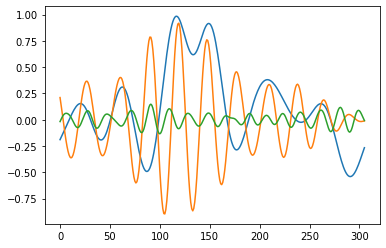

In [25]:
# X = X*10**5
# X[:,:,:,:,1] = X[:,:,:,:,1]*10
# X[:,:,:,:,2] = X[:,:,:,:,2]*10
plt.plot(X[0,2,2,:,0])
plt.plot(X[0,2,2,:,1])
plt.plot(X[0,2,2,:,2])


hide_toggle()

In [73]:
# scaler = preprocessing.scale()
# for i in range(len(CH_N)+6):
#     for j in range(3):
#         X_final[:,i//5,i%5,:,j] = preprocessing.scale(X_final[:,i//5,i%5,:,j])
# przyklad = 4444
# kanal = 5
# plt.plot(widmo[przyklad,kanal,:])
# plt.title(f'wykres dla przykładu = {przyklad} i dla kanału {CH_N[kanal]}')
# plt.show()
          
# X_widma = X_widma/10**9

hide_toggle()

In [74]:
# X_final = X_final*10**5
# for i in (100,1000,1600,555,1400):
#     plt.plot(X_final[i,2,2,:,0],label=y[i])
#     plt.plot(X_widma[i,2,2,:,1],label=y[i])
#     plt.plot(X_widma[i,2,2,:,2],label=y[i])
#     print(y[i])
# plt.legend()
# plt.show()

hide_toggle()

### Robienie niby-obrazków (słabe)

In [23]:
# X_images = np.zeros((X_final.shape[0],5,5,3))
# for rgb in range(3):
#     for i in range(25):
#         X_images[:,i//5,i%5,rgb] = np.mean(X_final[:,i//5,i%5,:,rgb],axis=-1)
#         mini=np.min(X_images[:,i//5,i%5,rgb])
#         maxi=np.max(X_images[:,i//5,i%5,rgb])
#         X_images[:,i//5,i%5,rgb] = (X_images[:,i//5,i%5,rgb]-mini) / ( maxi-mini )

hide_toggle()

### Resampling

In [121]:
X_fin_resamp = np.empty((X_final.shape[0],X_final.shape[1],X_final.shape[2],X_final.shape[3]//4,X_final.shape[4]))
for i in range(len(CH_N)+6):
    for j in range(3):
        for ind,signal in enumerate(X_final[:,i//5,i%5,:,j]):
            X_fin_resamp[ind,i//5,i%5,:,j] = ss.resample(signal,X_final.shape[3]//4)
            
hide_toggle()

#### Robienie odpowiedniego formatu y

In [75]:
y_1 = to_categorical(y).astype(np.integer)
print(f'rozmiar y1 = {y_1.shape}')

y_2= to_categorical(y2).astype(np.integer)
print(f'rozmiar y2 = {y_2.shape}')
hide_toggle()

rozmiar y1 = (661, 2)
rozmiar y2 = (562, 2)


## Hilbert

In [76]:
# obwiednia = ss.hilbert(X_final,axis=-2)
# obwiednia.shape

hide_toggle()

In [77]:
# plt.plot(obwiednia[0,2,2,:,1])
# plt.plot(X_final[0,2,2,:,1])
# plt.show()

hide_toggle()

# Zestaw #1 - resamplowane

In [18]:
# X_fin_resamp1=np.einsum('ijklm->imljk',X_fin_resamp)

# ind1 = np.arange(X_fin_resamp1.shape[0])
# np.random.shuffle(ind1)
# # X_images = X_images[ind,:,:,:]
# X_fin_resamp1 = X_fin_resamp1[ind1]
# y1 = y2[ind1]
# # X_images.shape

# X_train1, X_test1, y_train1, y_test1 = train_test_split(
#     X_fin_resamp1, y1, test_size=0.33, random_state=69)
# print(f'Rozmiar danych treningowych: X = {X_train1.shape}, y = {y_train1.shape}')
# print(f'Rozmiar danych wejściowych = {X_fin_resamp1.shape}')

hide_toggle()

Rozmiar danych treningowych: X = (12102, 3, 76, 5, 5), y = (12102, 2)
Rozmiar danych wejściowych = (18063, 3, 76, 5, 5)


# Zestaw #2 - nieresamplowane

In [26]:
# X = X_prim
y2 = to_categorical(y).astype(np.integer)

In [27]:
X_final1=np.einsum('ijklm->imljk',X)

# ind1 = np.array(indeksy)
# ind1 = np.random.randint(0,X_final1.shape[0],6000)
# ind1 = cool_ind
# ind1 = np.arange(X_final1.shape[0])
# np.random.shuffle(ind1)
# X_final1 = X_final1[ind1]
# y1 = y2[ind1]
y1=y2

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X_final1, y1, test_size=0.2, random_state=69)
print(f'Rozmiar danych treningowych: X = {X_train1.shape}, y = {y_train1.shape}')
print(f'Rozmiar danych wejściowych = {X_final1.shape}')

hide_toggle()

Rozmiar danych treningowych: X = (14450, 3, 306, 5, 5), y = (14450, 2)
Rozmiar danych wejściowych = (18063, 3, 306, 5, 5)


# Zestaw #3 - widma

In [54]:
y2 = to_categorical(y).astype(np.integer)

X_final1=np.einsum('ijklm->imljk',X_widma)

ind1 = np.random.randint(0,X_widma.shape[0],8000)
# ind1 = np.arange(X_final1.shape[0])
np.random.shuffle(ind1)
X_final1 = X_final1[ind1]
y1 = y2[ind1]

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X_final1, y1, test_size=0.2, random_state=69)
print(f'Rozmiar danych treningowych: X = {X_train1.shape}, y = {y_train1.shape}')
print(f'Rozmiar danych wejściowych = {X_final1.shape}')

hide_toggle()

Rozmiar danych treningowych: X = (6400, 1, 129, 5, 5), y = (6400, 2)
Rozmiar danych wejściowych = (8000, 1, 129, 5, 5)


# MEINE


if data_format='channels_first' 5D tensor with shape: (samples, time, channels, rows, cols)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 11560 samples, validate on 2890 samples
Epoch 1/30
11560/11560 [==============================] - 5s 402us/step - loss: 0.6966 - accuracy: 0.5364 - val_loss: 0.6740 - val_accuracy: 0.5820
Epoch 2/30
11560/11560 [==============================] - 4s 318us/step - loss: 0.6587 - accuracy: 0.6020 - val_loss: 0.6705 - val_accuracy: 0.5945
Epoch 3/30
11560/11560 [==============================] - 4s 322us/step - loss: 0.6368 - accuracy: 0.6220 - val_loss: 0.6872 - val_accuracy: 0.6045
Epoch 4/30
11560/11560 [==============================] - 4s 320us/step - loss: 0.6170 - accuracy: 0.6366 - val_loss: 0.6828 - val_accuracy: 0.5979
Epoch 5/30
11560/11560 [==============================] - 4s 320us/step - loss: 0.6094 - accuracy: 0.6501 - val_loss: 0.6639 - val_accuracy: 0.6149
Epoch 6/30
11560/11560 [===========

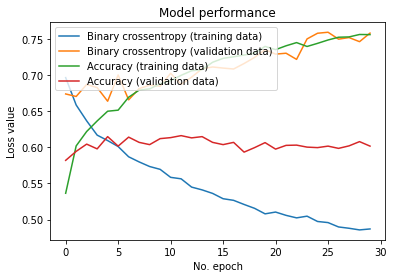

In [28]:
# del model

# Model configuration
batch_size = 100
no_epochs = 30
learning_rate = 0.001
no_classes = 2
validation_spl = 0.2
verbosity = 1
sample_shape = X_train1.shape[1:]

# model = Sequential()
# model.add(ConvLSTM2D(filters = 20, kernel_size = (2,2), activation='sigmoid', dropout = 0.3, return_sequences = True, input_shape = sample_shape,data_format='channels_first'))
# model.add(BatchNormalization())
# # model.add(SpatialDropout3D(1))
# model.add(Dense(10, activation='tanh'))
# model.add(ConvLSTM2D(filters = 10, kernel_size = (1,1), activation='tanh', dropout = 0.5, return_sequences = True))
# model.add(BatchNormalization())
# model.add(Flatten())
# model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
# model.add(Dense(no_classes, activation='softmax'))

model = Sequential()
model.add(ConvLSTM2D(filters = 15, kernel_size = (1,1), activation='tanh', dropout = 0.4, return_sequences = True, input_shape = sample_shape,data_format='channels_first',recurrent_activation='hard_sigmoid'))
# model.add(BatchNormalization())
# model.add(SpatialDropout3D(1))
# model.add(Dense(10, activation='tanh'))
# model.add(ConvLSTM2D(filters = 20, kernel_size = (1,1), activation='tanh', dropout = 0.5, return_sequences = True))
# model.add(BatchNormalization())
model.add(Flatten())
# model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(no_classes, activation='softmax'))


# Compile the model
model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.Adam(lr=learning_rate),
              metrics=['accuracy'])

# Fit data to model
history = model.fit(X_train1, y_train1,
            batch_size=batch_size,
            epochs=no_epochs,
            verbose=verbosity,
            validation_split=validation_spl)

# Generate generalization metrics
score = model.evaluate(X_test1, y_test1, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

# Plot history: Categorical crossentropy & Accuracy
plt.plot(history.history['loss'], label='Binary crossentropy (training data)')
plt.plot(history.history['val_loss'], label='Binary crossentropy (validation data)')
plt.plot(history.history['accuracy'], label='Accuracy (training data)')
plt.plot(history.history['val_accuracy'], label='Accuracy (validation data)')
plt.title('Model performance')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

hide_toggle()

In [19]:
# cool_ind = np.load('maybe_cool_ind.npy')

In [29]:
w = model.get_weights()

In [30]:
print(f'liczba warst = {len(w)}')
for no,warstwa in enumerate(w):
    print(f'rozmiar warstwy {no} = {warstwa.shape}')

liczba warst = 5
rozmiar warstwy 0 = (1, 1, 306, 60)
rozmiar warstwy 1 = (1, 1, 15, 60)
rozmiar warstwy 2 = (60,)
rozmiar warstwy 3 = (1125, 2)
rozmiar warstwy 4 = (2,)


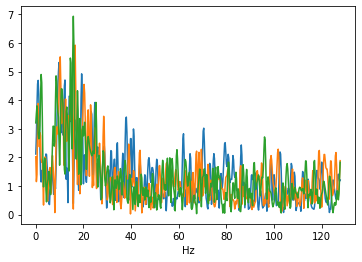

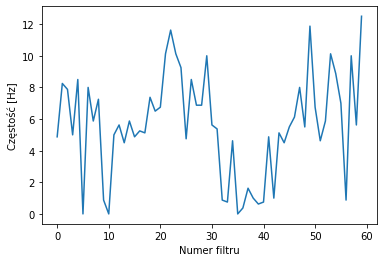

In [31]:
waga = w[0]
b = waga[0,0,:,0]
f, h0= ss.freqz(b, a=1, worN=512, whole=False,  fs=Fs)
b = waga[0,0,:,1]
f, h1= ss.freqz(b, a=1, worN=512, whole=False,  fs=Fs)
b = waga[0,0,:,2]
f, h2= ss.freqz(b, a=1, worN=512, whole=False,  fs=Fs)

plt.figure()
plt.plot(f, abs(h0))
plt.plot(f, abs(h1))
plt.plot(f, abs(h2))
plt.xlabel('Hz')
plt.show()

max_freqs=[]
for i in range(waga.shape[-1]):
    b = waga[0,0,:,i]
    f, h0 = ss.freqz(b, a=1, worN=512, whole=False,  fs=Fs)
    max_freqs.append(np.argmax(abs(h0))/8)
plt.plot(max_freqs)
plt.xlabel("Numer filtru")
plt.ylabel("Częstość [Hz]")
plt.show()

# Ze stronki MACHINECURVE

In [33]:
del model

# Model configuration
batch_size = 100
no_epochs = 30
learning_rate = 0.001
no_classes = 2
validation_split = 0.2
verbosity = 1
sample_shape = X_train1.shape[1:]

model = Sequential()
model.add(Conv3D(32, kernel_size=(4,1,1), activation='tanh', kernel_initializer='he_uniform',data_format='channels_first' ,input_shape=sample_shape))
model.add(MaxPooling3D(pool_size=(3,1,1)))
model.add(Dropout(0.5))
# model.add(Dense(32, activation='softmax'))
# model.add(Conv3D(64, kernel_size=(3,2,2), activation='relu', kernel_initializer='he_uniform'))
# model.add(MaxPooling3D(pool_size=(2,1,1)))
# model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(no_classes, activation='softmax'))

# Compile the model
model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.Adam(lr=learning_rate),
              metrics=['accuracy'])

# Fit data to model
history = model.fit(X_train1, y_train1,
            batch_size=batch_size,
            epochs=no_epochs,
            verbose=verbosity,
            validation_data = (X_test1, y_test1))


# Plot history: Categorical crossentropy & Accuracy
plt.plot(history.history['loss'], label='Binary crossentropy (training data)')
plt.plot(history.history['val_loss'], label='Binary crossentropy (validation data)')
plt.plot(history.history['accuracy'], label='Accuracy (training data)')
plt.plot(history.history['val_accuracy'], label='Accuracy (validation data)')
plt.title('Model performance')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

hide_toggle()

Train on 14450 samples, validate on 3613 samples
Epoch 1/30
 1700/14450 [==>...........................] - ETA: 12:24 - loss: 7.0772 - accuracy: 0.5118

KeyboardInterrupt: 

# MARTYNY

In [23]:
del model
model = Sequential()
#model.add(Dense(X_train.shape[-1], activation='sigmoid'))
model.add(ConvLSTM2D(filters = 20, kernel_size = (2,2), activation='sigmoid', dropout = 0.2, return_sequences = True, input_shape = (None,3,5,5),data_format='channels_first'))
model.add(BatchNormalization())
model.add(SpatialDropout3D(1))
model.add(Dense(10, activation='tanh'))
model.add(ConvLSTM2D(filters = 10, kernel_size = (1,1), activation='tanh', dropout = 0.6, return_sequences = True))
model.add(BatchNormalization())
#model.add(SpatialDropout3D(1))
#model.add(Dense(5, activation='tanh'))
# model.add(keras.layers.Conv3D(filters=6, kernel_size=(2,2,1), strides=(1, 1, 1), padding='valid', data_format=None, dilation_rate=(1, 1, 1)))
# model.add(ConvLSTM2D(filters = 5, kernel_size = (1,1), activation='sigmoid', dropout = 0.2, return_sequences = True))
# model.add(BatchNormalization())
# model.add(SpatialDropout3D(1))
# model.add(ConvLSTM2D(filters = 3, kernel_size = (1,1), activation='tanh', dropout = 0.2, return_sequences = True))
# model.add(BatchNormalization())
# #model.add(SpatialDropout3D(1))
# #model.add(Dense(10, activation='sigmoid'))
# model.add(ConvLSTM2D(filters = 2, kernel_size = (1,1), activation='sigmoid', dropout = 0.2, return_sequences = True))
# model.add(BatchNormalization())
#model.add(SpatialDropout3D(1))
#model.add(Dense(2, activation='tanh'))
model.add(ConvLSTM2D(filters = 3, kernel_size = (1,1), activation='tanh', dropout = 0.4,))
model.add(BatchNormalization())
# model.add(SpatialDropout2D(1))
model.add(Dense(1, activation='tanh'))
model.add(Flatten())
# model.add(Dense(50, activation='sigmoid'))
#model.add(Dense(100, activation='sigmoid'))
# model.add(Dense(10, activation='tanh'))
model.add(Dense(2, activation='sigmoid'))
# model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
# print(model.summary())
# fit = model.fit(X_train1, y_train1, validation_data = (X_test1, y_test1), epochs = 100)
# predict = model.predict(X_test1)
# scores = model.evaluate(X_test1, y_test1, verbose=0)
# print("Błąd na zbiorze testowym: %.3f%%" % (100-scores[1]*100))
# plt.figure()
# plt.plot(fit.history['val_loss'] )# na zbiorze walidacyjnym
# plt.plot(fit.history['loss'])# na zb. uczącym 
# plt.legend(('zb. walidacyjny', 'zb. uczący'))
# plt.xlabel('epoki')
# plt.ylabel('błąd')
# plt.show()

# miss_classified = np.unique(
#                     np.nonzero(
#                         to_categorical(predict) != y_test)[0])

hide_toggle()

# Zestaw #2

### Upośledzona wersja do 2D conv

In [38]:
X2 = X_fin_resamp1[:,:,:,:,0]
ind2 = np.arange(X2.shape[0])
np.random.shuffle(ind2)

X2 = X2[ind2]
y22 = y2[ind2]

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2, y2, test_size=0.33, random_state=69)
print(f'Rozmiar danych treningowych: X = {X_train2.shape}, y = {y_train2.shape}')
print(f'Rozmiar danych wejściowych = {X2.shape}')

hide_toggle()

Rozmiar danych treningowych: X = (12102, 76, 5, 5), y = (12102, 2)
Rozmiar danych wejściowych = (18063, 76, 5, 5)


In [40]:
# del model

# Model configuration
batch_size = 10
no_epochs = 30
learning_rate = 0.001
no_classes = 2
validation_split = 0.2
verbosity = 1
sample_shape = X_train2.shape[1:]

model = Sequential()
model.add(Conv2D(32, kernel_size=(2,2), activation='tanh', kernel_initializer='he_uniform',data_format='channels_first' ,input_shape=sample_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
model.add(Dense(32, activation='softmax'))
model.add(Conv2D(64, kernel_size=(3,2), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D(pool_size=(2,1)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(no_classes, activation='softmax'))

# Compile the model
# model.compile(loss=keras.losses.binary_crossentropy,
#               optimizer='sgd',
#               metrics=['accuracy'])

# # Fit data to model
# history = model.fit(X_train2, y_train2,
#             batch_size=batch_size,
#             epochs=no_epochs,
#             verbose=verbosity,
#             validation_data = (X_test2, y_test2))


# # Plot history: Categorical crossentropy & Accuracy
# plt.plot(history.history['loss'], label='Categorical crossentropy (training data)')
# plt.plot(history.history['val_loss'], label='Categorical crossentropy (validation data)')
# plt.plot(history.history['accuracy'], label='Accuracy (training data)')
# plt.plot(history.history['val_accuracy'], label='Accuracy (validation data)')
# plt.title('Model performance for 3D MNIST Keras Conv3D example')
# plt.ylabel('Loss value')
# plt.xlabel('No. epoch')
# plt.legend(loc="upper left")
# plt.show()

hide_toggle()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



### Zabawy/testy na sinusach

Resamplowanie

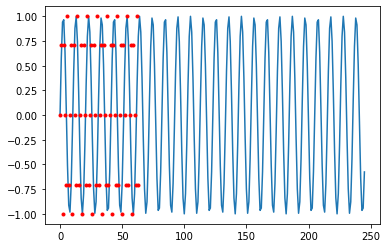

In [24]:
t = np.arange(0,1,1/246)
sinus = np.sin(2*np.pi*24*t)
down_sin = ss.resample(sinus,64)
plt.plot(sinus)
plt.plot(down_sin,'r.')
plt.show()

hide_toggle()

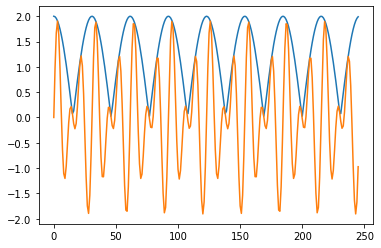

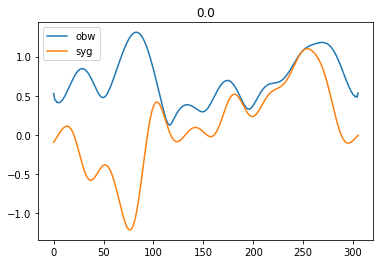

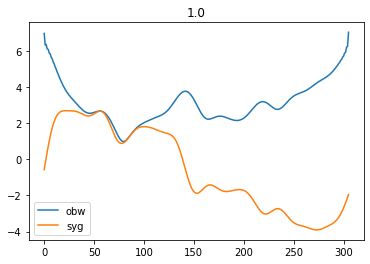

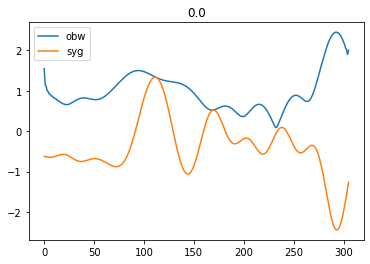

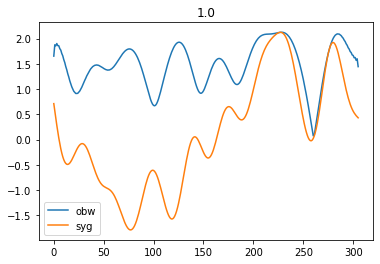

In [25]:
sigg=sinus+np.sin(2*np.pi*16*t)
obw = ss.hilbert(sigg)
plt.plot(np.abs(obw))
# plt.show()
plt.plot(sigg)
plt.show()

for i in (1000,12000,8000,18000):
    sig_real = X_final[i,2,2,:,0]
    obw2 = ss.hilbert(sig_real)
    plt.title(y[i])
    plt.plot(np.abs(obw2),label='obw')
    # plt.show()
    plt.plot(sig_real, label='syg' )
    plt.legend()
    plt.show()
    
hide_toggle()